### Importing Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [61]:
df = pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


<p>Data for some dates are missing because of there is no tradings happens in holidays </p>

In [62]:
# (rows, cols)
df.shape

(2956, 7)

#### check whether both "Close" and "Adj Close" have same data

In [63]:
df[df['Close'] == df['Adj Close']].shape

(2956, 7)

both have sama data. Then drop one column that is "Adj Close"

In [64]:
df = df.drop(['Adj Close'], axis=1) # Axis 1-col, 0-row
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,34334500


In [65]:
# summary of columns
df.describe()

,Open,High,Low,Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Open    2956 non-null   float64
 2   High    2956 non-null   float64
 3   Low     2956 non-null   float64
 4   Close   2956 non-null   float64
 5   Volume  2956 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 138.7+ KB


In [67]:
# change the data type of Date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

# EDA

In [68]:
# check for null values
#df.isna().sum()
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [69]:
# check for duplicated rows
df.duplicated().sum()

0

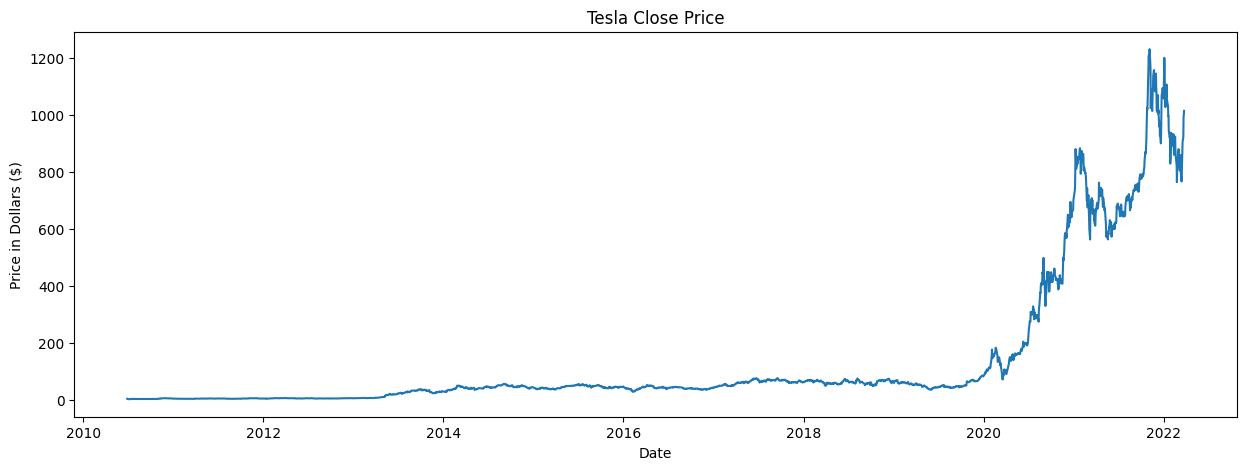

In [70]:
#Close price with time

plt.figure(figsize=(15,5))
plt.plot(df["Date"],df["Close"])
plt.title("Tesla Close Price")
plt.xlabel("Date")
plt.ylabel("Price in Dollars ($)")
plt.show()

In [71]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [72]:
features = df.columns[1:]
features 

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

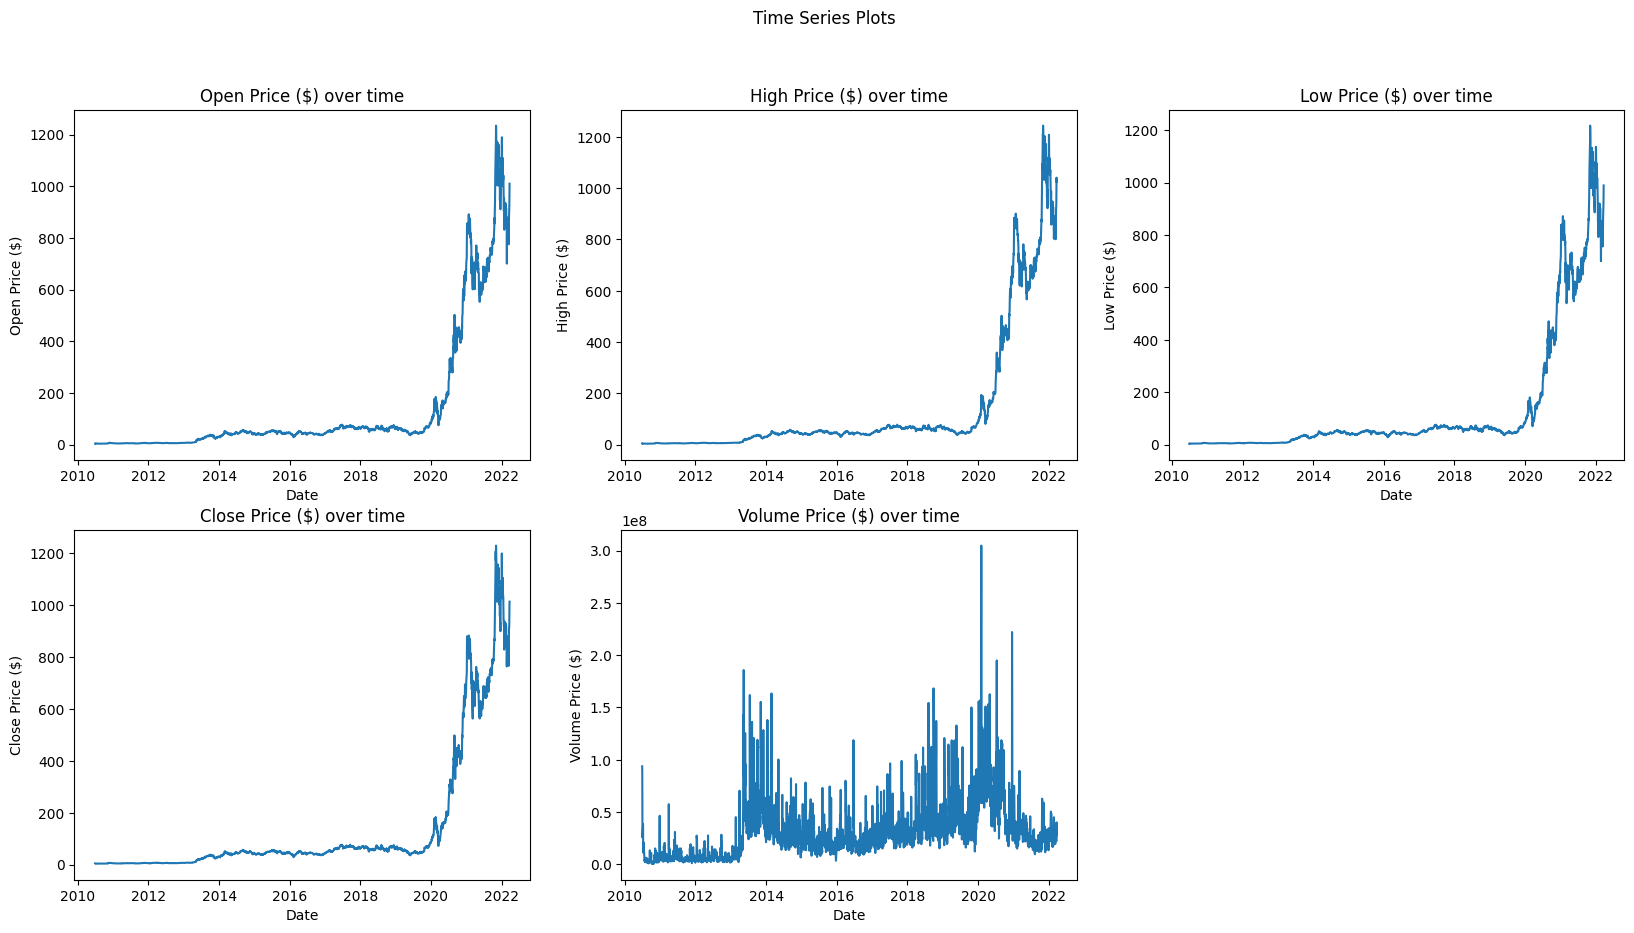

In [73]:
# Time series plot
plt.subplots(figsize=(20,10))
plt.suptitle("Time Series Plots")

for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.lineplot(x="Date", y=col, data=df)
    plt.xlabel("Date")
    plt.ylabel(col + " Price ($)")
    plt.title(col + " Price ($) over time")
plt.show()

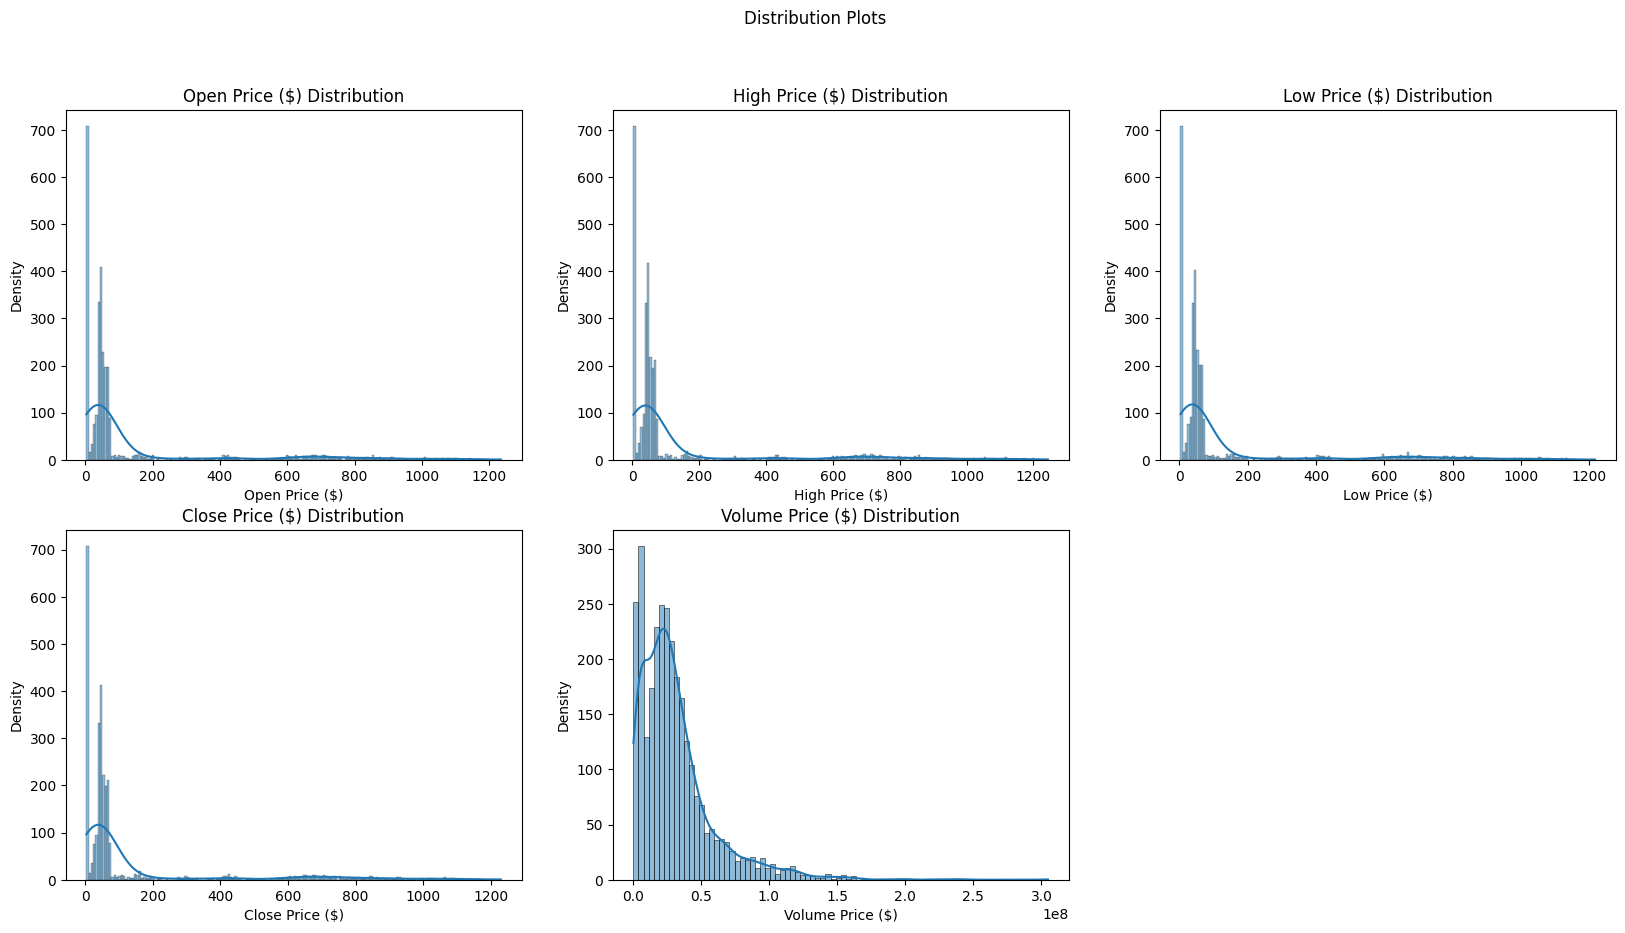

In [74]:
# Distributon plot

'''
sb.displot is used to create a figure-level distribution plot and does not work directly within plt.
subplot as it returns a FacetGrid object, not a matplotlib Axes object that plt.subplot expects.

To create individual distribution plots for each feature using Seaborn, 
Should use sb.histplot or sb.kdeplot inside each subplot
'''
plt.subplots(figsize=(20,10))
plt.suptitle("Distribution Plots")

for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.histplot(df[col], kde=True)
    plt.title(col + " Price ($) Distribution")
    plt.xlabel(col + " Price ($)")
    plt.ylabel("Density")

plt.show()

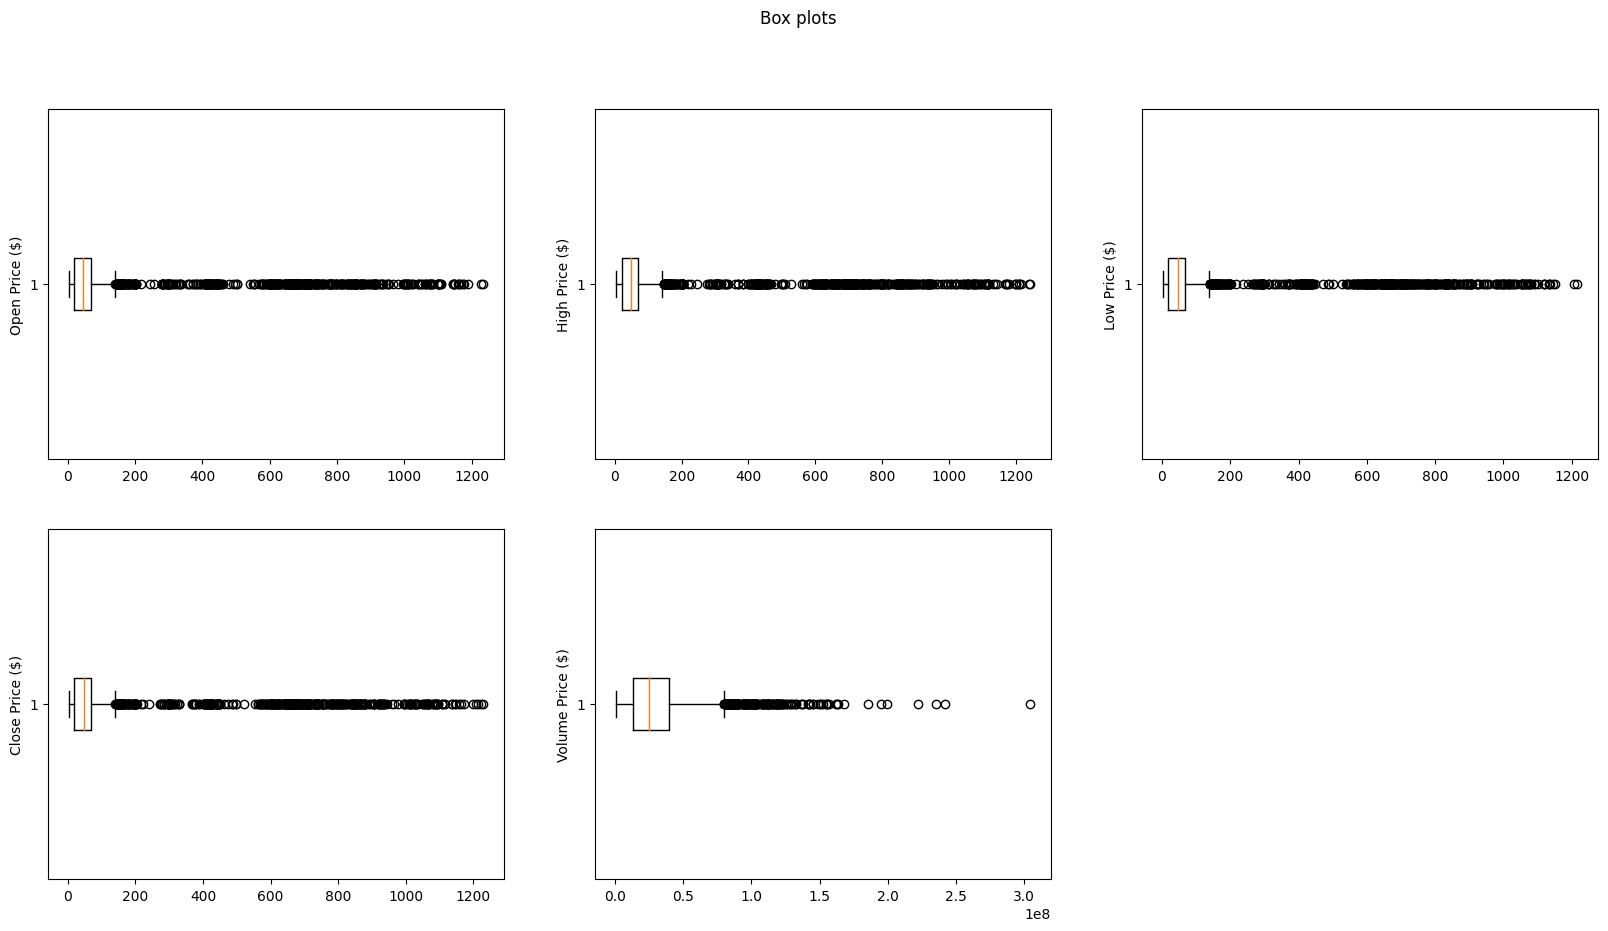

In [75]:
plt.subplots(figsize=(20,10))
plt.suptitle("Box plots")

for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[col], vert=False)
    plt.ylabel(col + " Price ($)")
plt.show()

# Feature Engineering

In [76]:
# Add separate columns day, month, year
df["Date"]

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
2951   2022-03-18
2952   2022-03-21
2953   2022-03-22
2954   2022-03-23
2955   2022-03-24
Name: Date, Length: 2956, dtype: datetime64[ns]

In [77]:
df['Day'] = df['Date'].dt.day
df['Month'] = df.iloc[:, 0].dt.month # iloc[row_idx,col_idx]
df['Year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


#### Add quarter status
Quarter is group of 3 months. Every company prepare quarterly results that help to analyse performance

In [78]:
df["is_quarter_end"] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


#### Yearly summary

In [79]:
features[:-1]

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

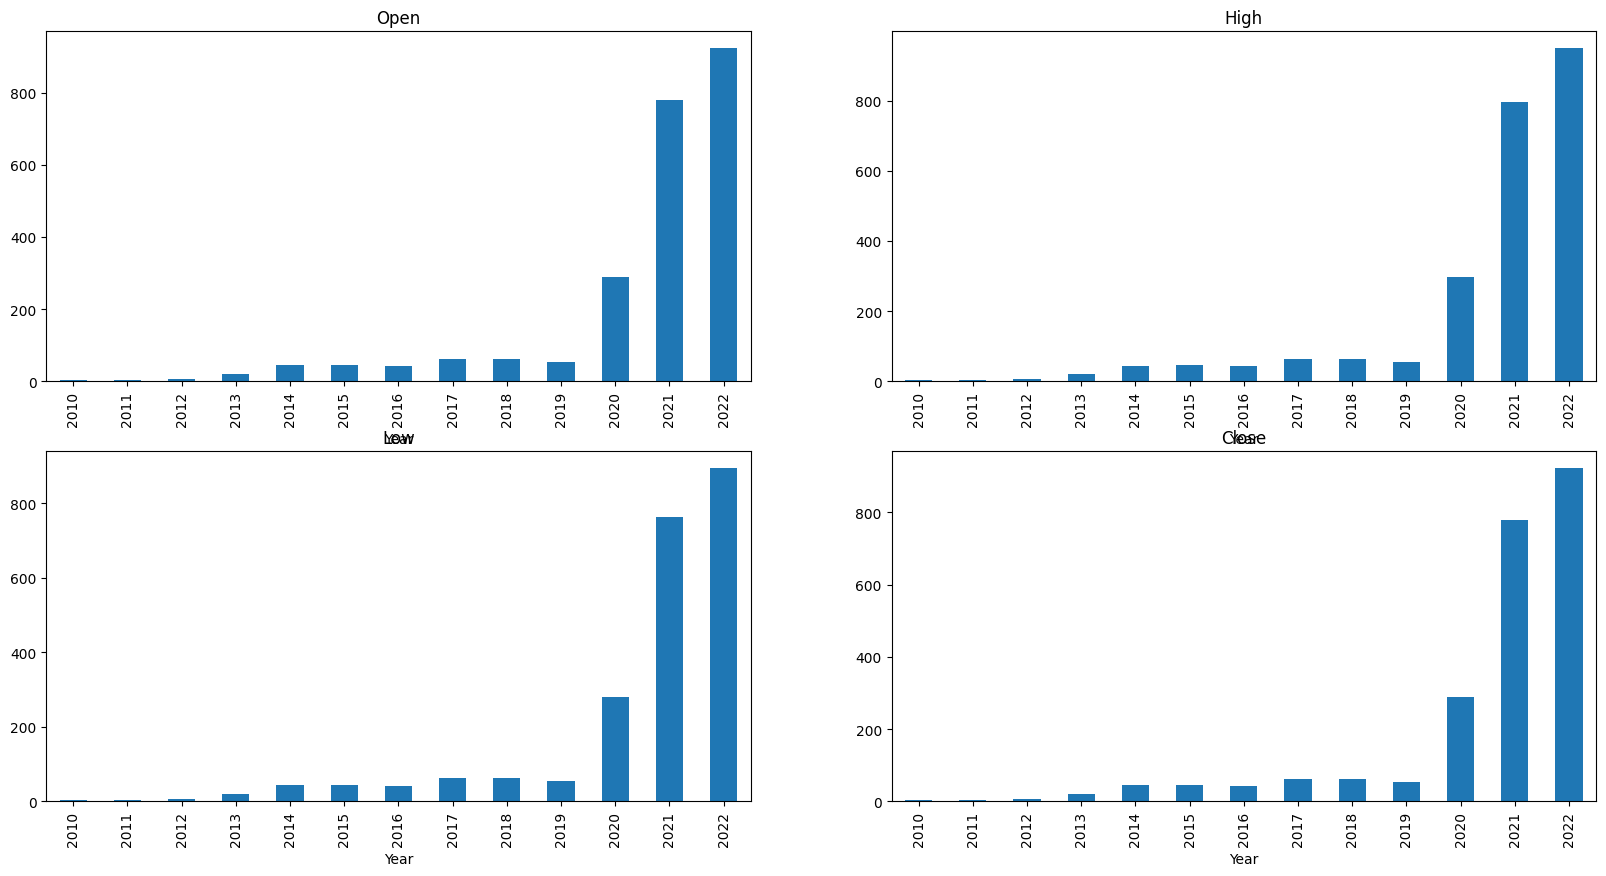

In [80]:
data_grouped = df.groupby("Year").mean()
plt.subplots(figsize=(20,10))

for i,col in enumerate(features[:-1]):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.title(col)
plt.show()

In [81]:
df.groupby("is_quarter_end")[features].mean()

,Open,High,Low,Close,Volume
is_quarter_end,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07


Prices are higher in the months where quarter ends

### Adding some columns to help training model

In [82]:
df["Open-Close"] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1,0)
    # shift(-1) next day (1) previous day
    # np.where(condition, true val, False val)

In [83]:
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end,Open-Close,High-Low,Target
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1,-0.978,1.492,0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1,0.392,1.424,0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0,0.608,1.130,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0,0.760,0.878,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0,0.778,0.834,0


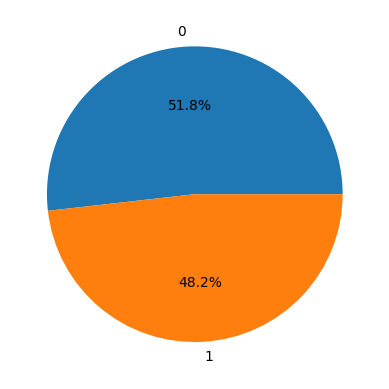

In [84]:
plt.pie(df['Target'].value_counts().values,
        labels=[0,1], autopct='%1.1f%%')
plt.show()

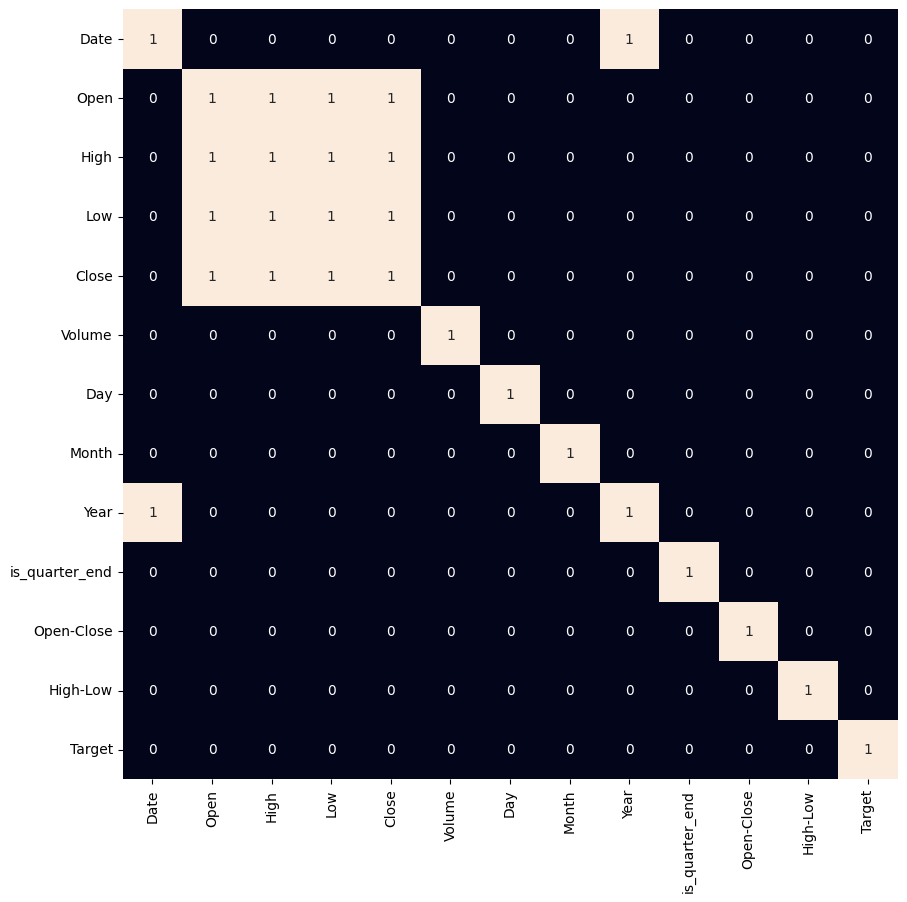

In [85]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.9, annot=True,cbar=False)
plt.show()

Newly introduced columns are not highly correlated

# Data Splitting & Normalization

In [86]:
m_feature = df[['Open-Close','High-Low','is_quarter_end']]
target = df['Target']

scaler = StandardScaler()
m_feature = scaler.fit_transform(m_feature)

In [87]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    m_feature,target, test_size=0.3, random_state=123)

In [88]:
print(X_train.shape,X_valid.shape, Y_train.shape, Y_valid.shape)

(2069, 3) (887, 3) (2069,) (887,)


# Model Development & Evalution

Models </br>
    <ul>
        <li>Logistic Regression
        <li>Support Vector Classifier
        <li>DecisionTreeClassifier
        <li>RandomForestClassifier
    </ul>

### Logistic Regression

In [89]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, logreg.predict_proba(X_train)[:,1]))
    
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, logreg.predict_proba(X_valid)[:,1]))


Training Accuracy :  0.5106115922394048
Validation Accuracy :  0.47992384908272756


### Support Vector Classifier

In [90]:
svc = SVC(kernel='poly',probability=True)
svc.fit(X_train, Y_train)

print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, svc.predict_proba(X_train)[:,1]))
    
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, svc.predict_proba(X_valid)[:,1]))


Training Accuracy :  0.48858609410320514
Validation Accuracy :  0.5249679310976727


### Decision Tree Classifier

In [91]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, dtree.predict_proba(X_train)[:,1]))
    
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, dtree.predict_proba(X_valid)[:,1]))

Training Accuracy :  0.9999995321786254
Validation Accuracy :  0.5159504611813572


### Random Forest Classifier

In [92]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, rfc.predict_proba(X_train)[:,1]))
    
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, rfc.predict_proba(X_valid)[:,1]))

Training Accuracy :  0.999996725250378
Validation Accuracy :  0.5098064667196057


##### Accuracy Checking Method (ROC AUC):

ROC AUC (Receiver Operating Characteristic Area Under the Curve) is used here instead of traditional accuracy because it's more informative for binary classification, especially when dealing with imbalanced datasets.
It measures the ability of the model to distinguish between classes (0 and 1). A higher ROC AUC indicates better performance.

##### Conclusion:

Based on the provided accuracies, SVC shows the highest validation accuracy, indicating it might be the best-performing model among the ones tested here. However, ensure to balance between accuracy and model complexity.</br></br>
Logistic Regression also shows reasonable performance and is simpler and more interpretable compared to SVC, which might be preferable depending on your requirements.</br></br>
DTC and RFC, while showing high training accuracies, need regularization or pruning to improve generalization to unseen data.